# Data Cleaning and Preparation:

In [2]:
#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st
import seaborn as sns
#loading the data set
df=pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
#find did any null values exists
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [4]:
# finding different datatypes in data set
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [5]:
# finding column names
print(df.columns)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


In [6]:
#remove outlier, NaN
import numpy as np
non_zero=['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP']
for column in non_zero:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)
    print(df[column])

0       120.000000
1       132.000000
2       133.000000
3       134.000000
4       131.948232
           ...    
2121    140.000000
2122    140.000000
2123    140.000000
2124    140.000000
2125    142.000000
Name: LB, Length: 2126, dtype: float64
0       0.000000
1       0.006380
2       0.003322
3       0.002561
4       0.006515
          ...   
2121    0.000000
2122    0.000775
2123    0.000980
2124    0.000679
2125    0.001616
Name: AC, Length: 2126, dtype: float64
0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
2121    0.961268
2122    0.000000
2123    0.000000
2124    0.000000
2125   -0.000188
Name: FM, Length: 2126, dtype: float64
0       0.000000
1       0.006380
2       0.008306
3       0.007742
4       0.008143
          ...   
2121    0.007426
2122    0.006979
2123    0.006863
2124    0.006110
2125    0.008078
Name: UC, Length: 2126, dtype: float64
0       0.000000
1       0.003190
2       0.003322
3       0.002561
4     

In [7]:
# finding number of null values in each column
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [8]:
#check for columns with mixed types
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(f"Column {col} has mixed data types.")
    else:
        print(f"Column {col} don't have mixed data types.")

Column LB don't have mixed data types.
Column AC don't have mixed data types.
Column FM don't have mixed data types.
Column UC don't have mixed data types.
Column DL don't have mixed data types.
Column DS don't have mixed data types.
Column DP don't have mixed data types.
Column ASTV don't have mixed data types.
Column MSTV don't have mixed data types.
Column ALTV don't have mixed data types.
Column MLTV don't have mixed data types.
Column Width don't have mixed data types.
Column Tendency don't have mixed data types.
Column NSP don't have mixed data types.


# Statistical Summary


In [10]:
# Calculating and finding statistical summary
summary = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Standard Deviation': df.std(),
    'Interquartile Range': df.quantile(0.75) - df.quantile(0.25)
})
print(summary)

                Mean      Median  Standard Deviation  Interquartile Range
LB        133.340204  133.000000           11.214379            14.000000
AC          0.003189    0.001572            0.004381             0.005606
FM          0.009894    0.000000            0.067540             0.002567
UC          0.004391    0.004484            0.003340             0.004685
DL          0.001895    0.000000            0.003343             0.003289
DS          0.000002    0.000000            0.000141             0.000000
DP          0.000173    0.000000            0.000836             0.000000
ASTV       46.995984   49.000000           18.813973            29.000000
MSTV        1.364378    1.200000            1.173632             1.000000
ALTV       22.372512   22.000000           17.910025             5.000000
MLTV        8.748677    8.000000            7.456895             5.475000
Width      70.425020   68.000000           42.719183            63.000000
Tendency    0.313246    0.000000      

In [11]:
# Highlighting the interesting findings
for column in df.columns:
    mean = df[column].mean()
    median = df[column].median()
    if mean > median:
        print(f"{column}: The mean is higher than the median, suggesting a right-skewed distribution.")
    elif mean < median:
        print(f"{column}: The mean is lower than the median, suggesting a left-skewed distribution.")
    else:
        print(f"{column}: The mean and median are equal, suggesting a symmetric distribution.")


LB: The mean is higher than the median, suggesting a right-skewed distribution.
AC: The mean is higher than the median, suggesting a right-skewed distribution.
FM: The mean is higher than the median, suggesting a right-skewed distribution.
UC: The mean is lower than the median, suggesting a left-skewed distribution.
DL: The mean is higher than the median, suggesting a right-skewed distribution.
DS: The mean is higher than the median, suggesting a right-skewed distribution.
DP: The mean is higher than the median, suggesting a right-skewed distribution.
ASTV: The mean is lower than the median, suggesting a left-skewed distribution.
MSTV: The mean is higher than the median, suggesting a right-skewed distribution.
ALTV: The mean is higher than the median, suggesting a right-skewed distribution.
MLTV: The mean is higher than the median, suggesting a right-skewed distribution.
Width: The mean is higher than the median, suggesting a right-skewed distribution.
Tendency: The mean is higher than

# Data Visualization

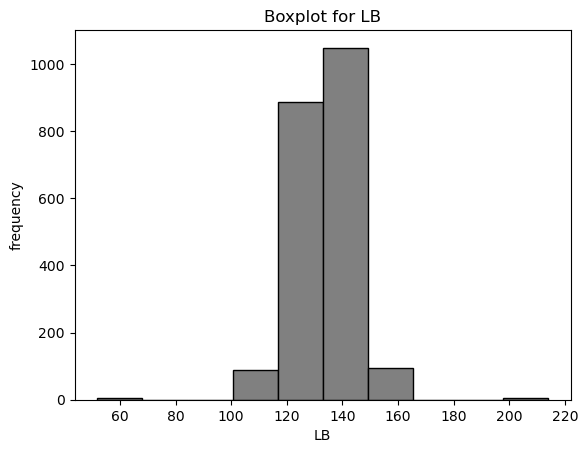

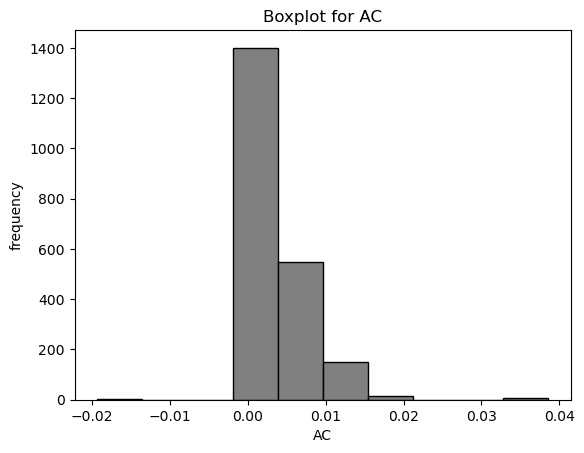

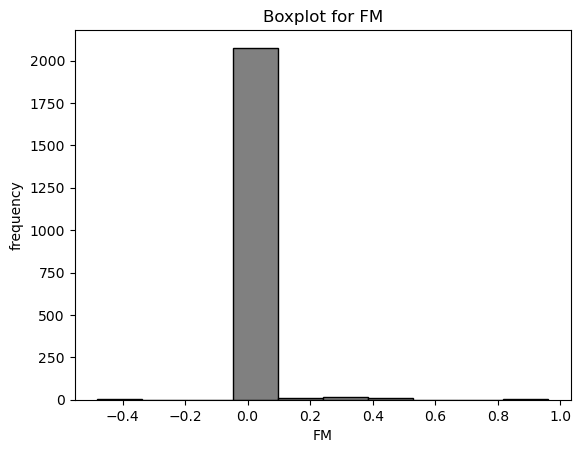

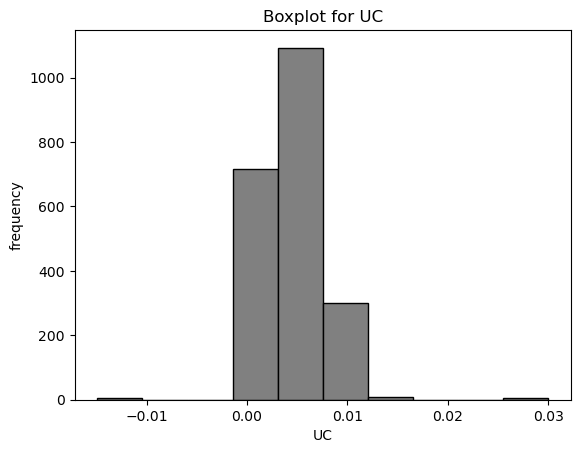

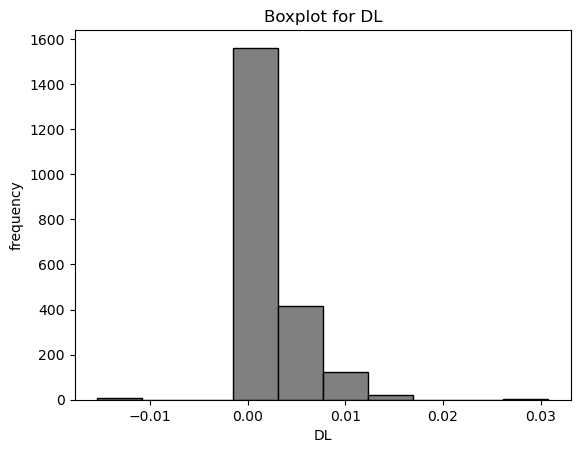

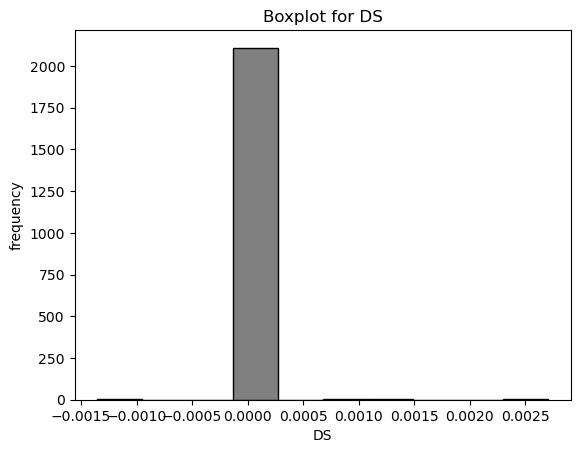

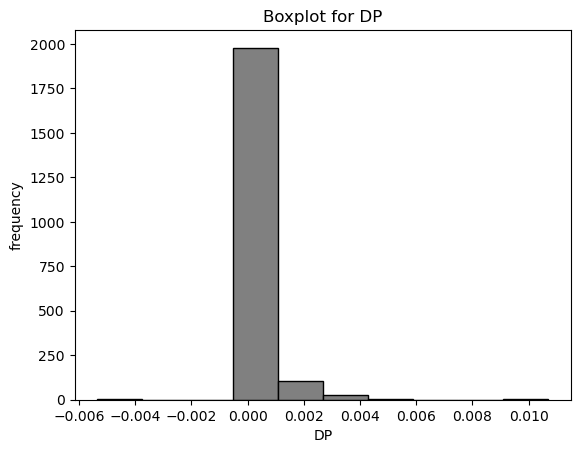

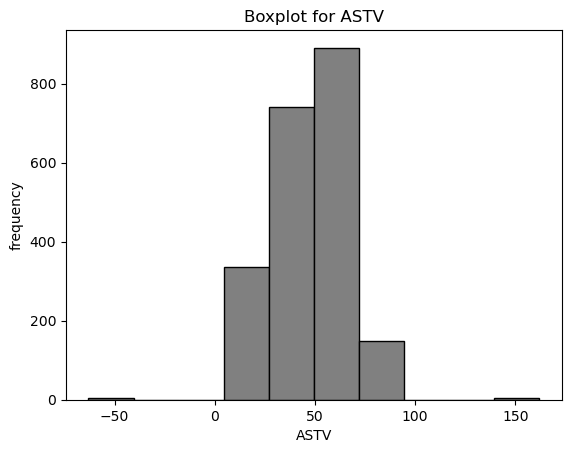

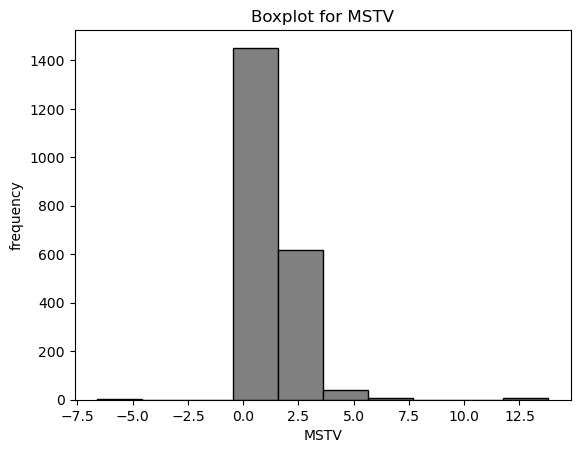

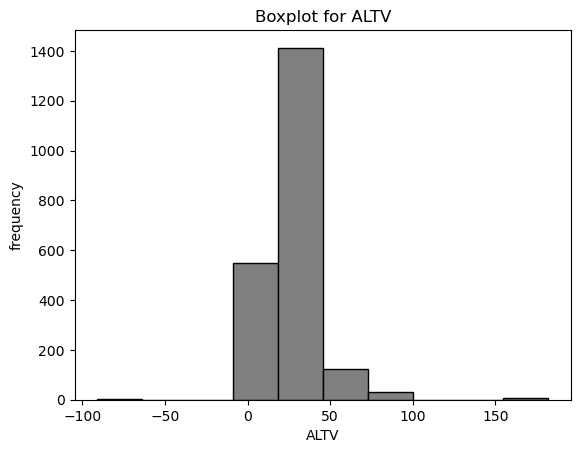

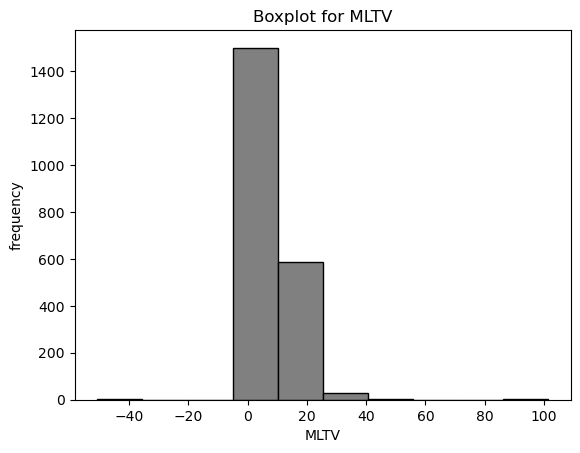

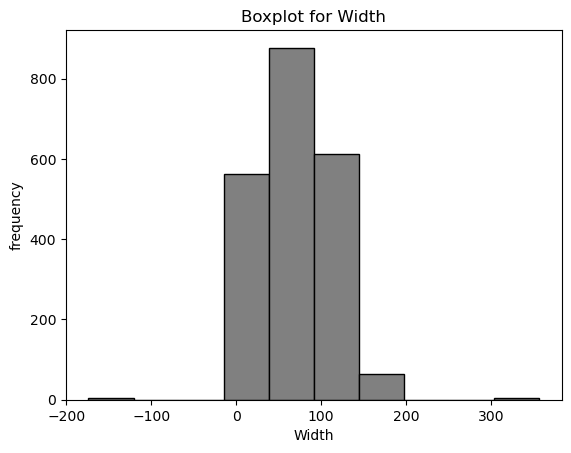

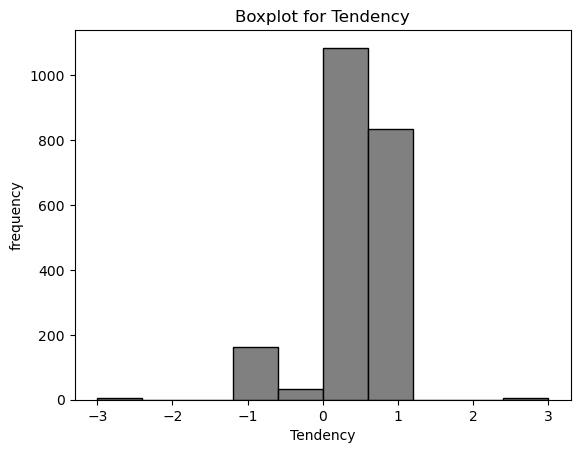

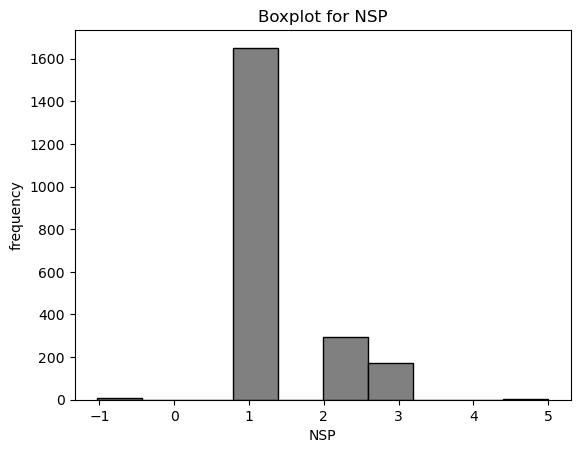

In [13]:
# creating histograms for numerical columns
# selecting only numerical columns
for column in df.select_dtypes(include='number').columns:
    #creating histogram
    plt.hist(df[column],edgecolor='black',color='grey')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
    plt.show()

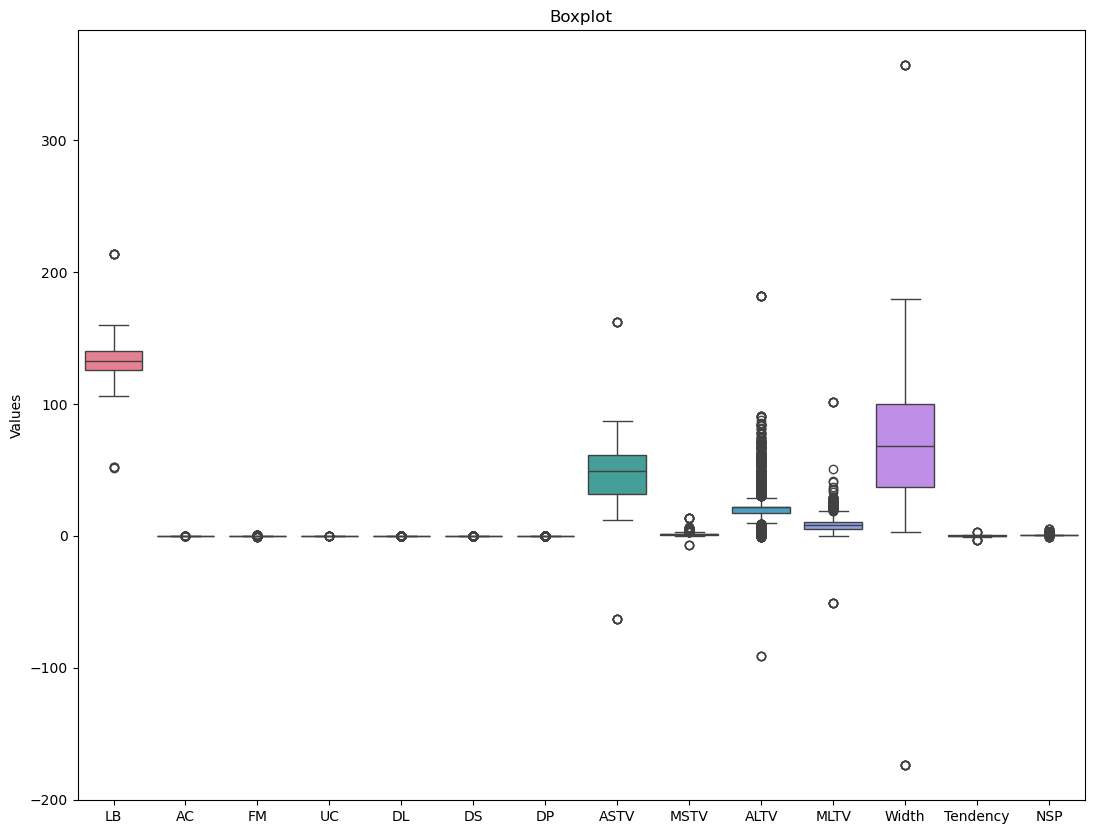

In [14]:
# creating boxplot
plt.figure(figsize=(13, 10))
sns.boxplot(df)
plt.title('Boxplot')
plt.ylabel('Values')
plt.show()

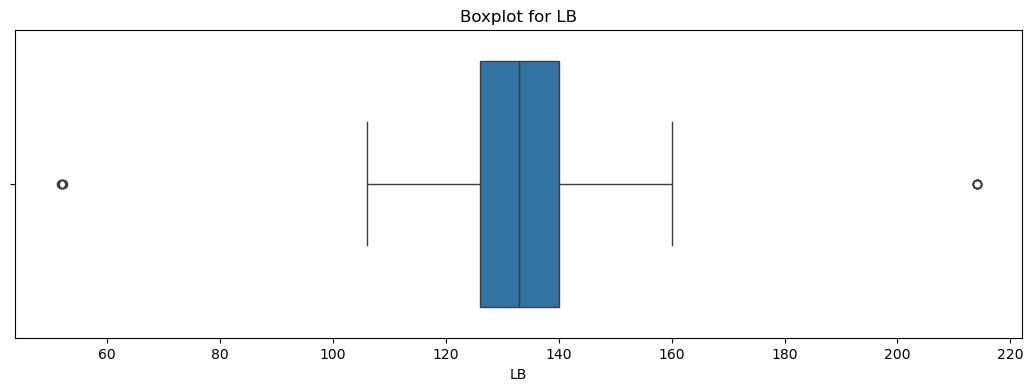

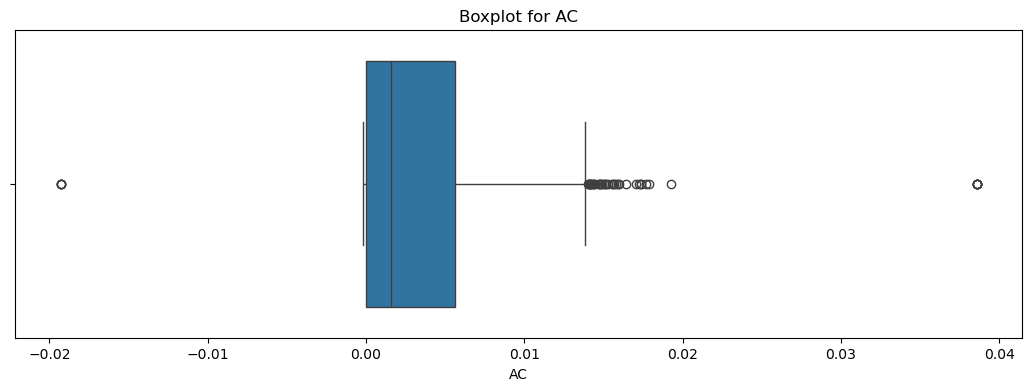

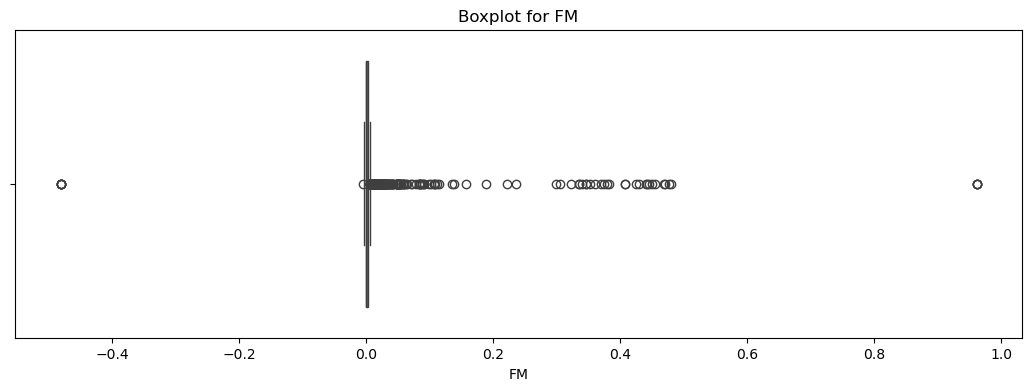

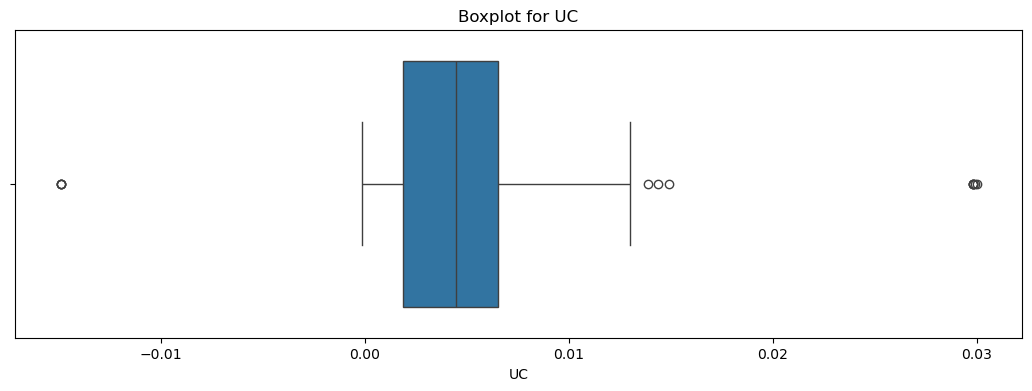

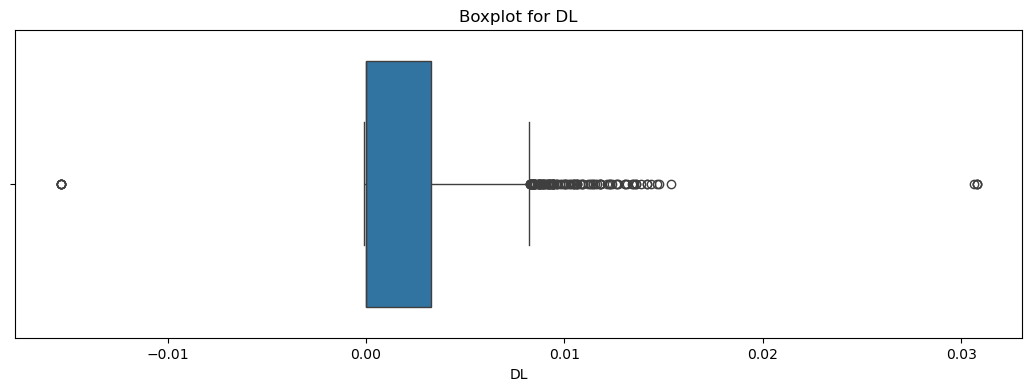

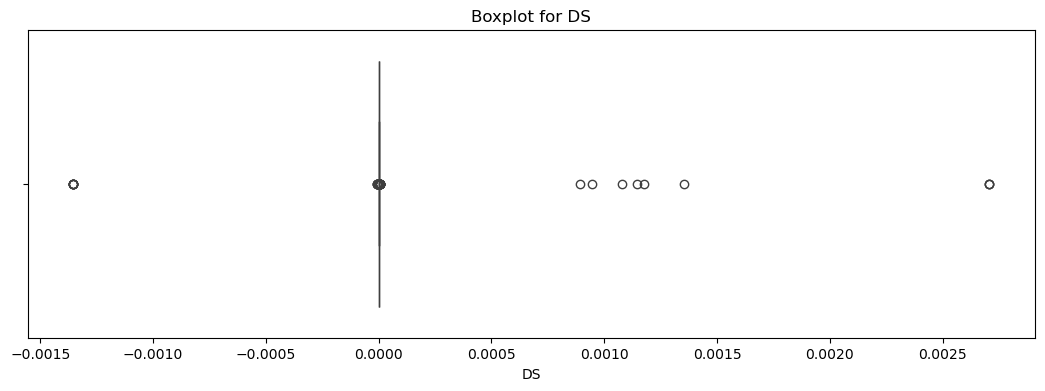

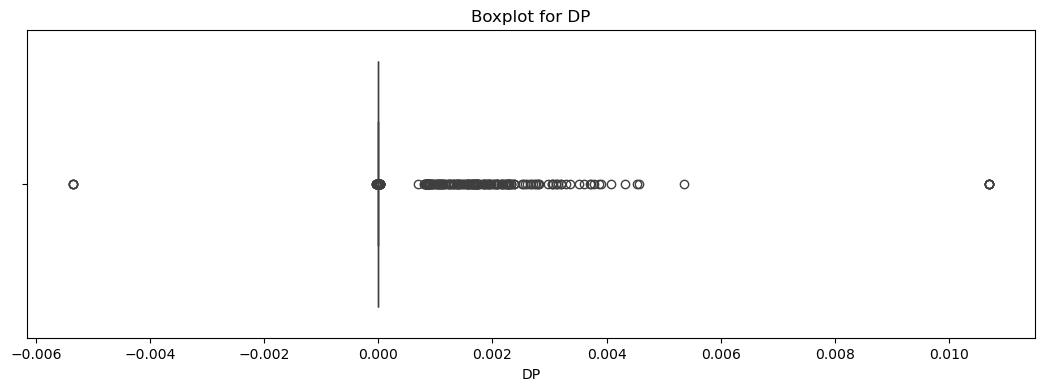

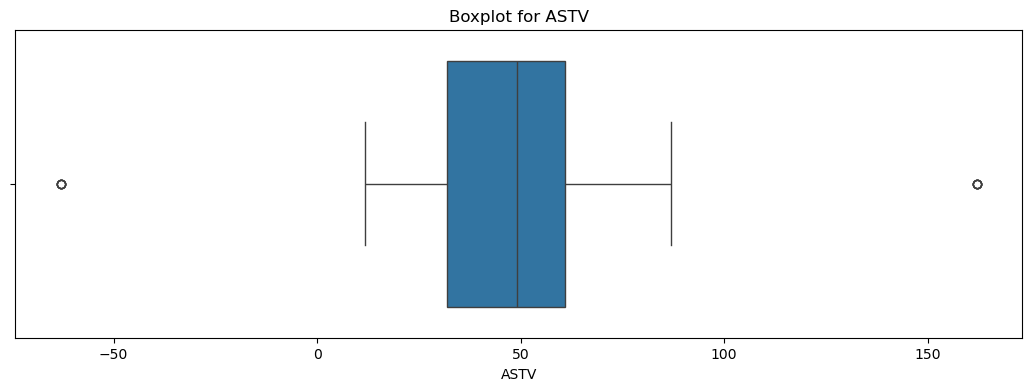

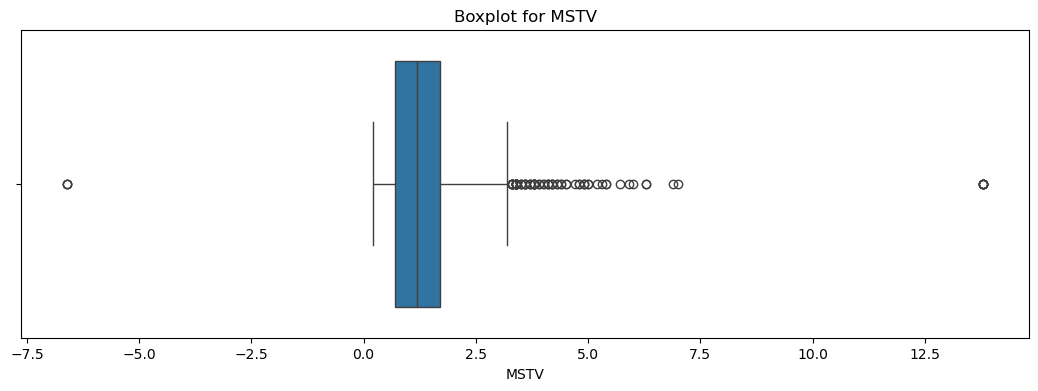

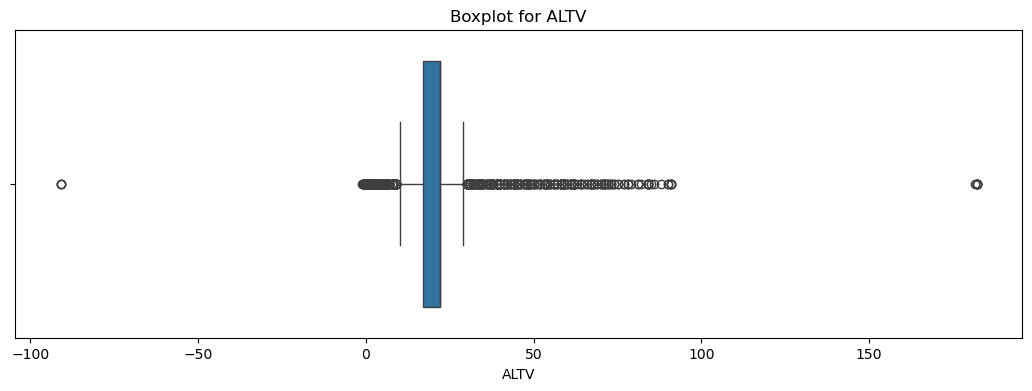

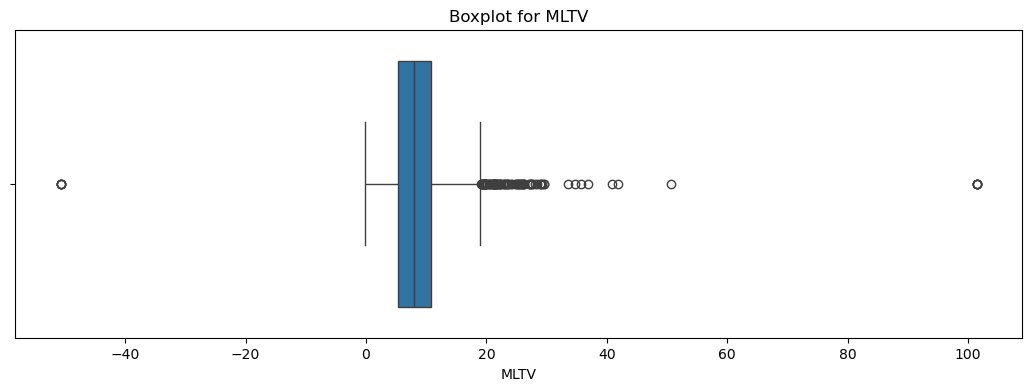

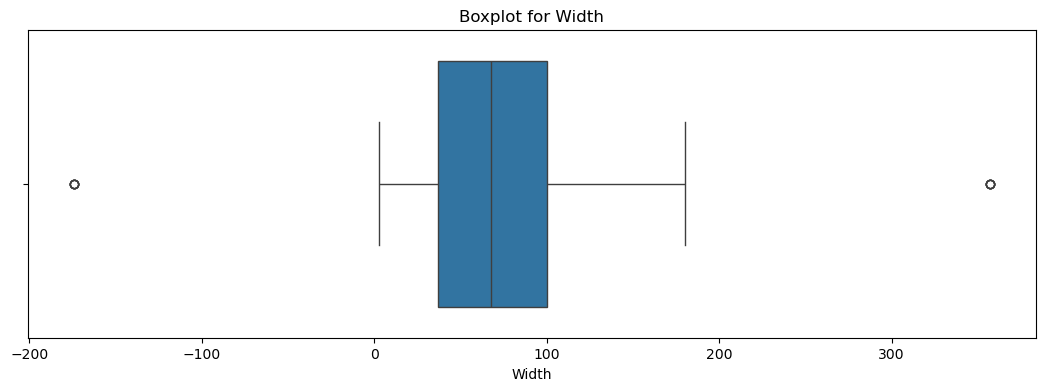

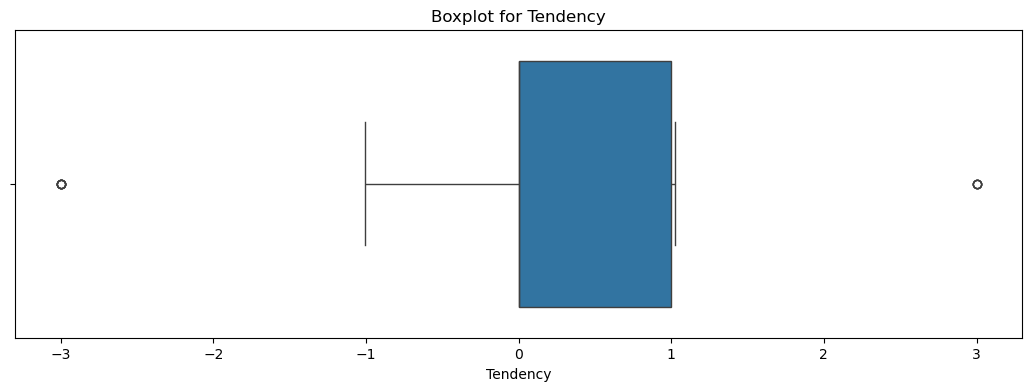

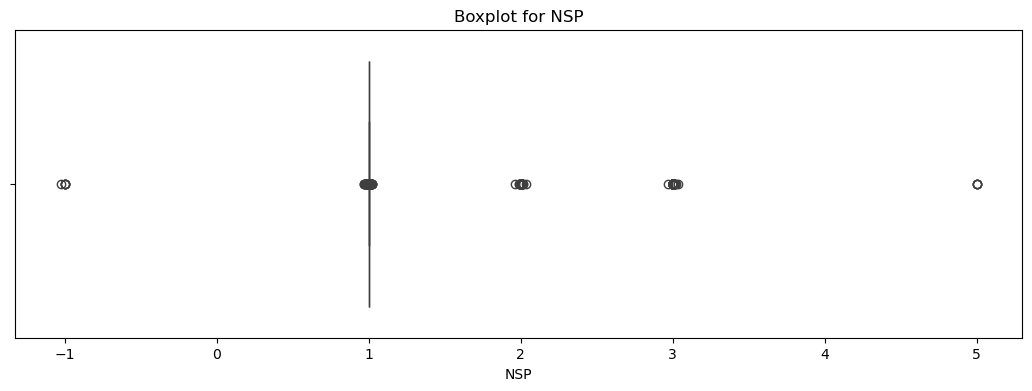

In [15]:
# Alternatively, using seaborn for better visualization creating boxplot for each column seperately
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(13, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables

<Axes: >

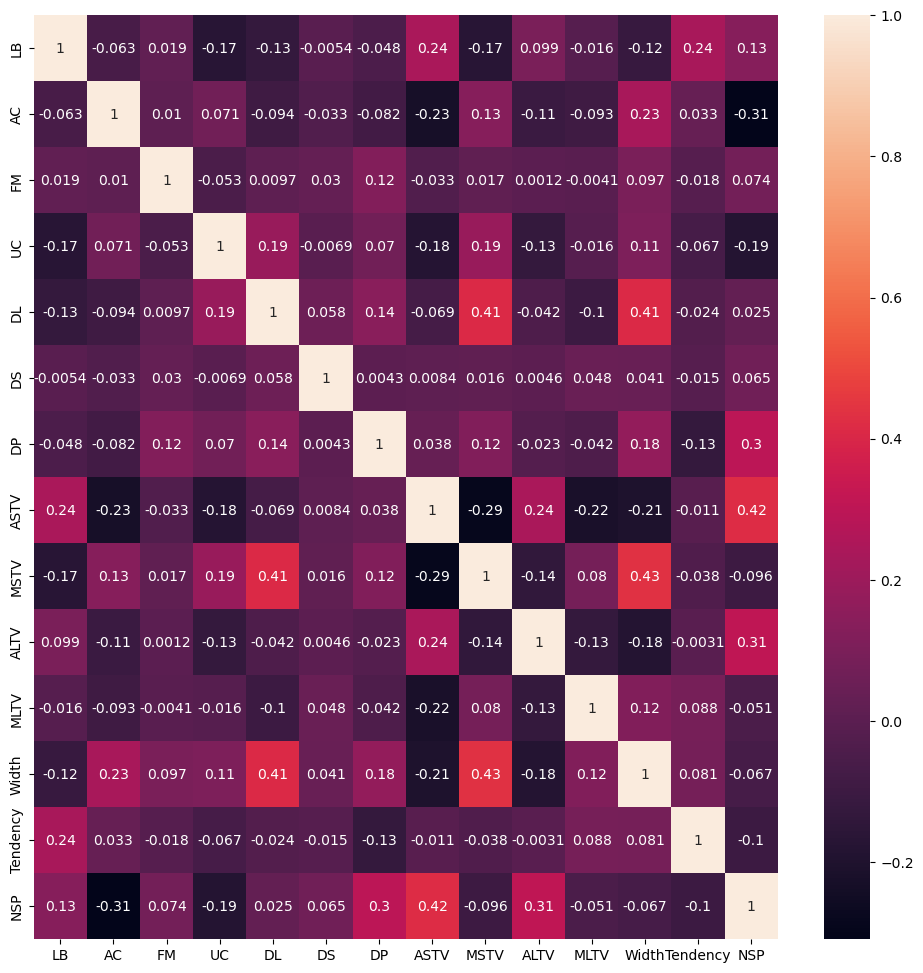

In [17]:
# Generating correlation heatmaps to explore relationships between pairs of variables

plt.figure(figsize=(12,12))
correlation=df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True)

<Axes: >

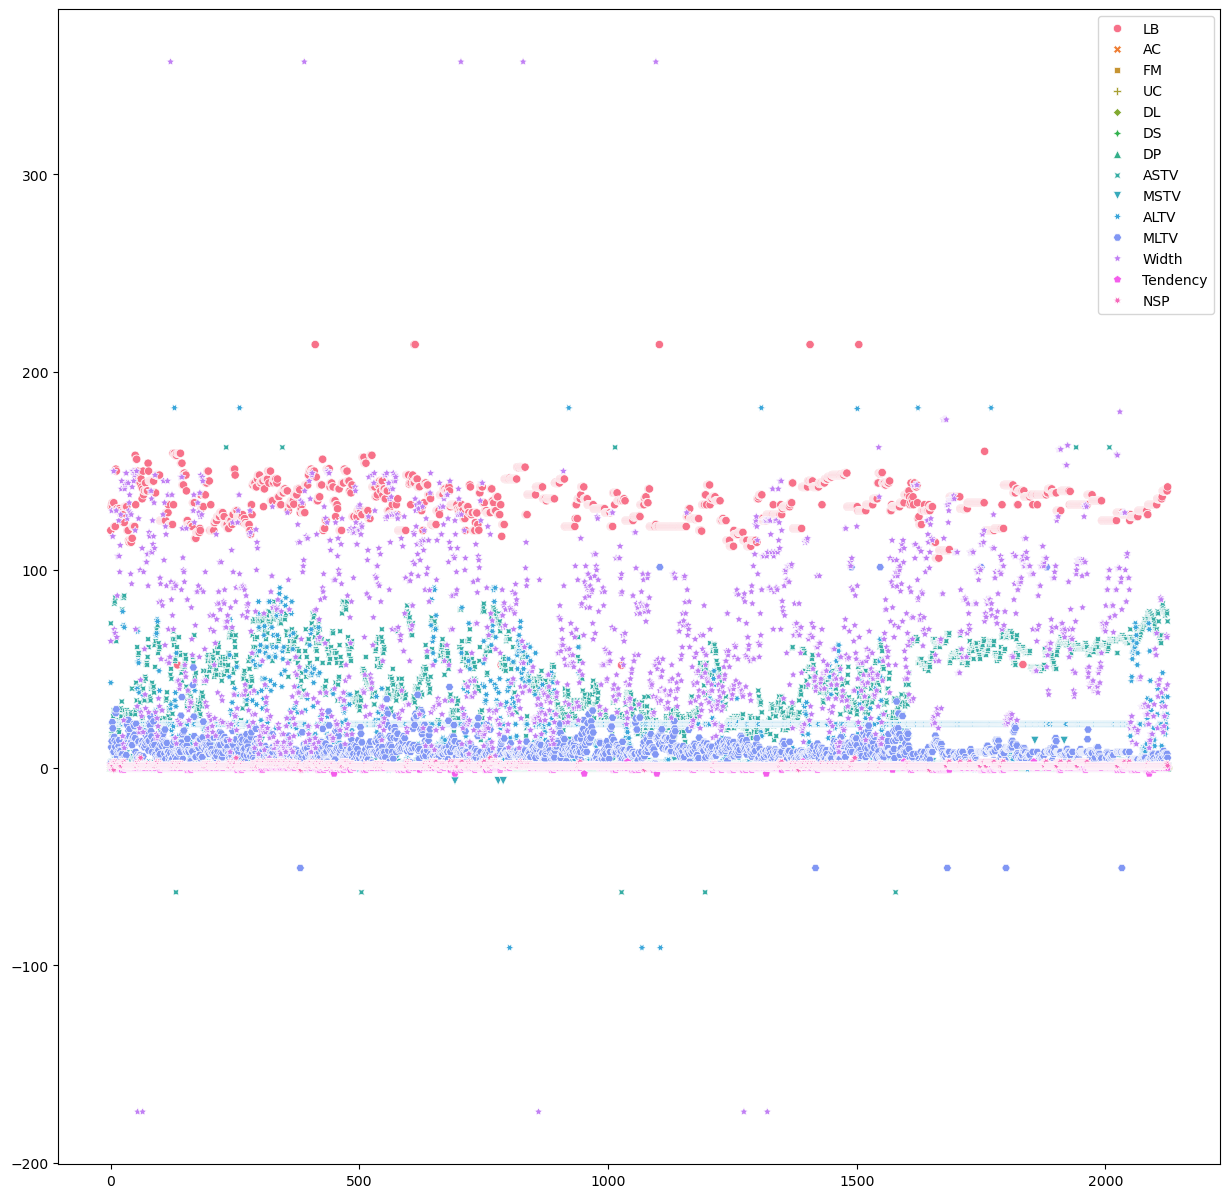

In [18]:
# Generating scatter plots to explore relationships between pairs of variables

plt.figure(figsize=(15,15))
sns.scatterplot(df)

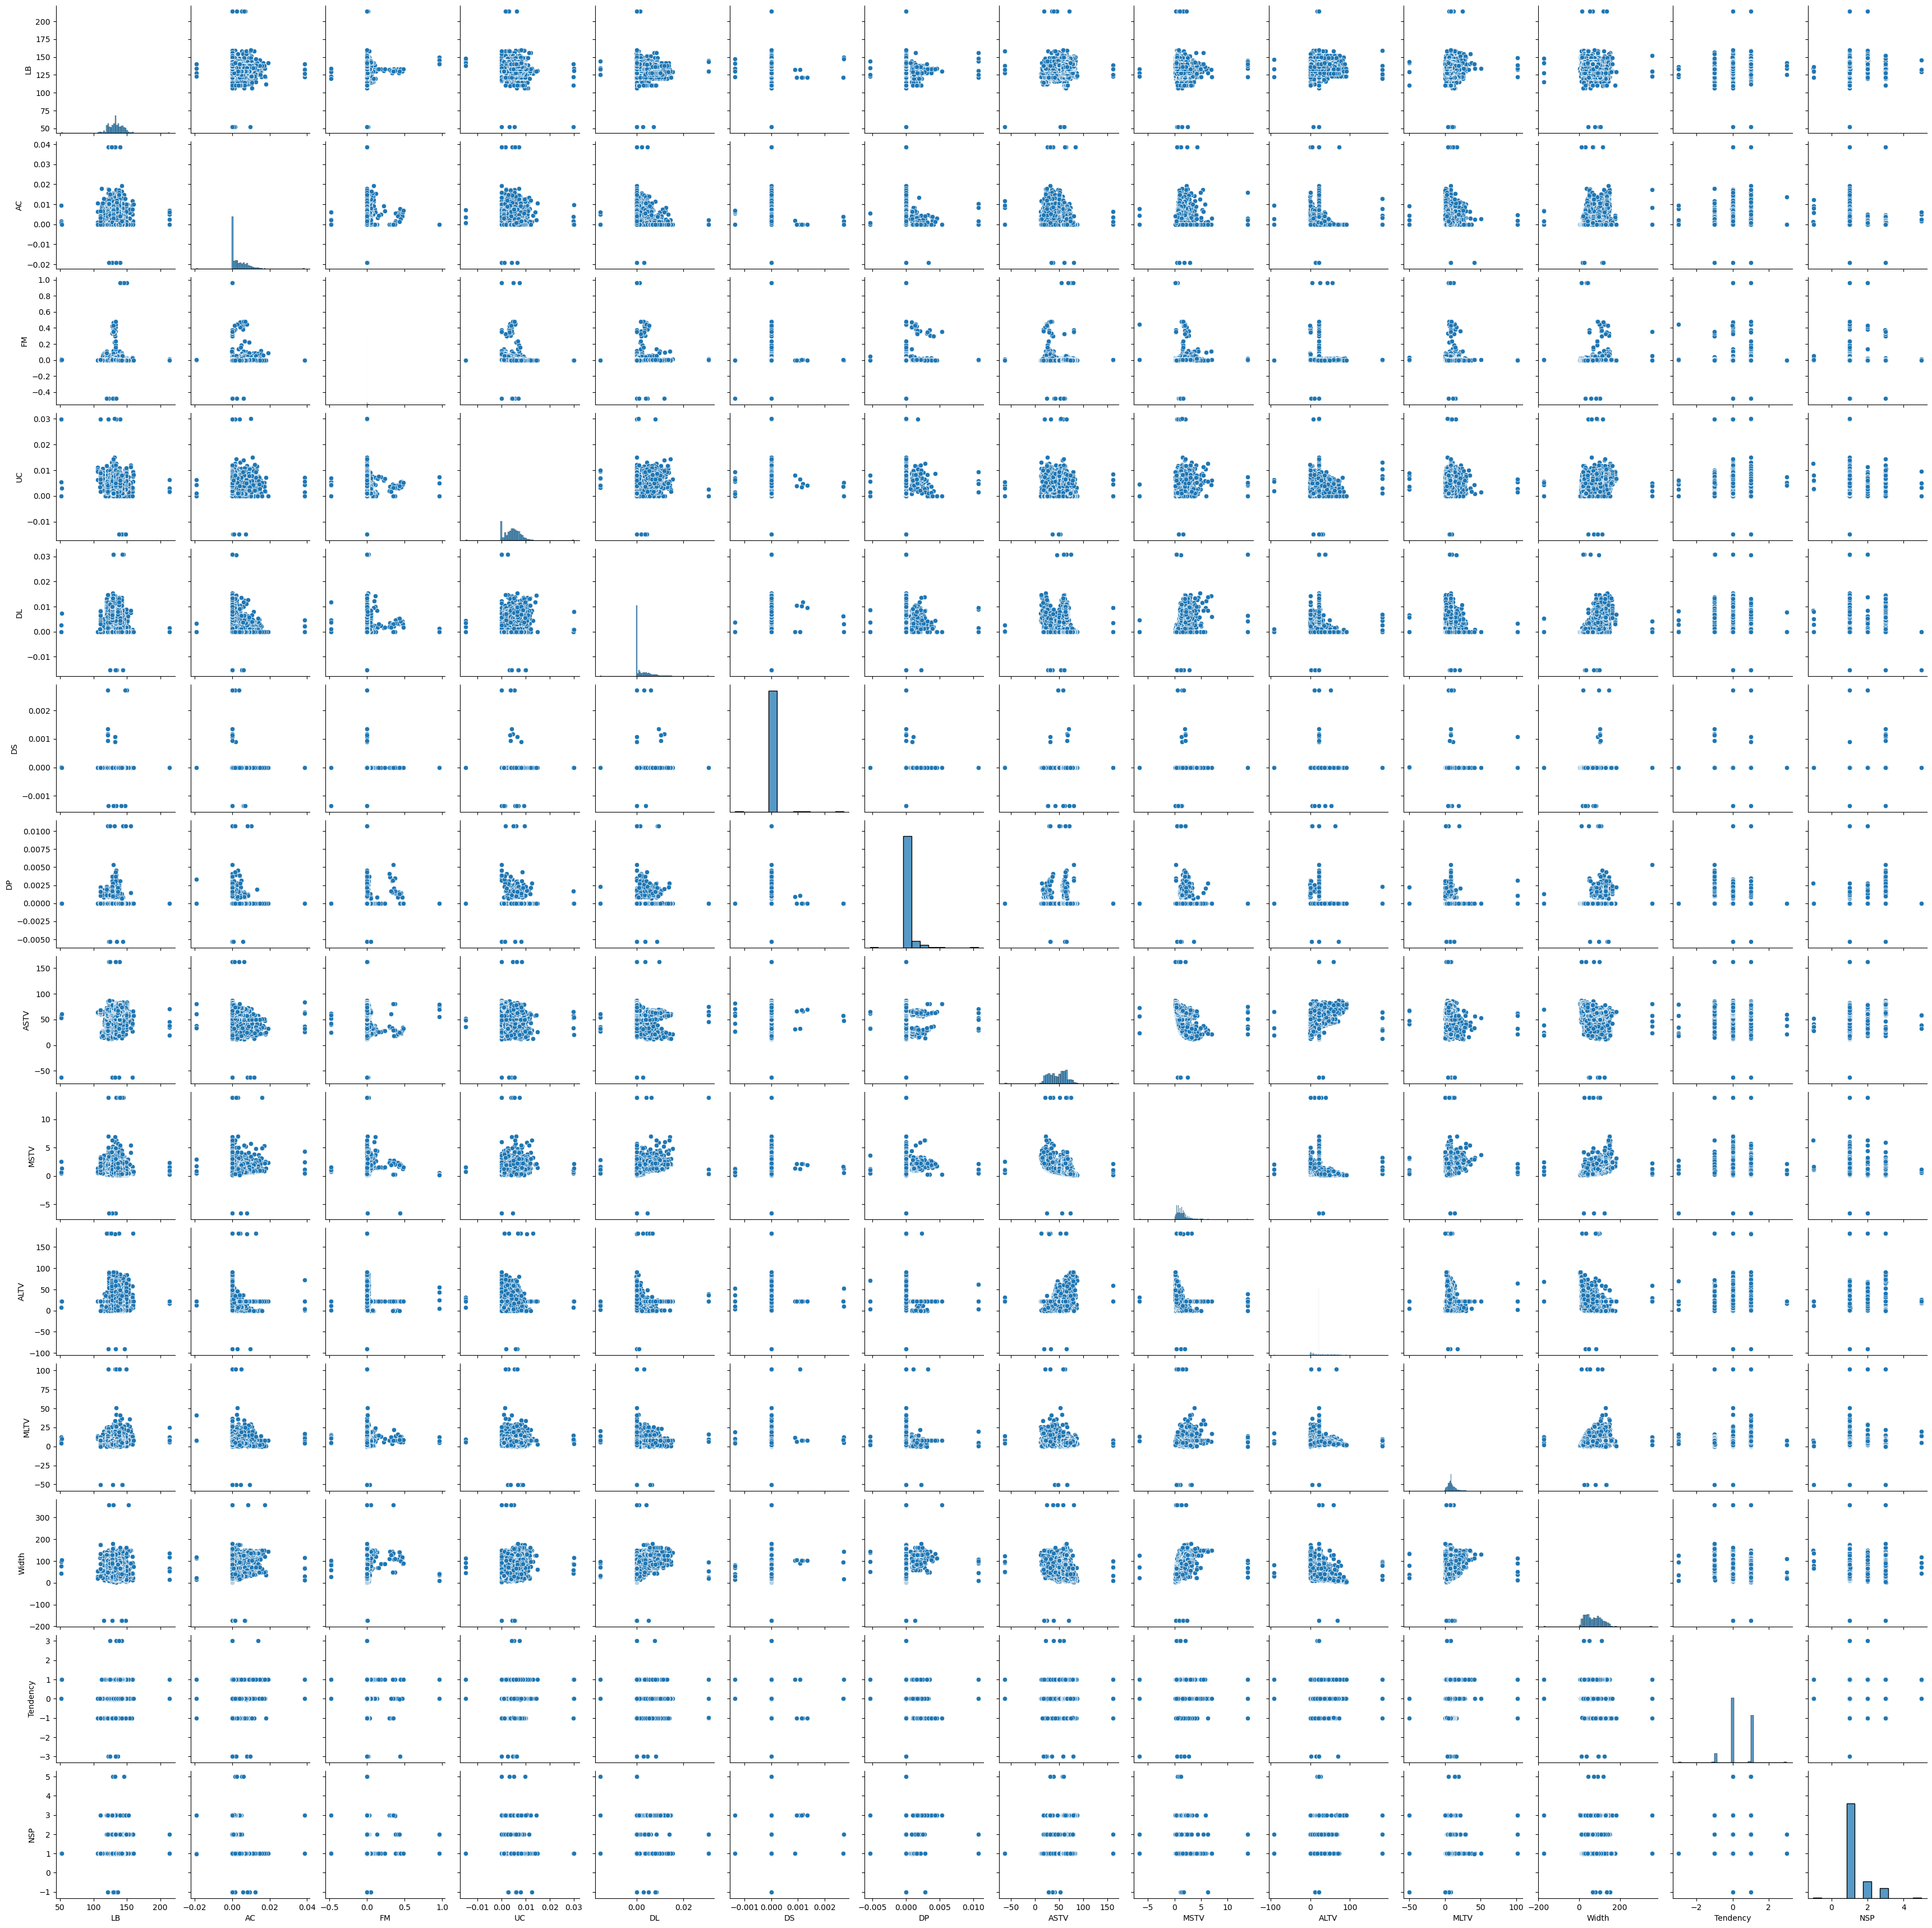

In [19]:
# making pairplot for better visualization
sns.pairplot(df)

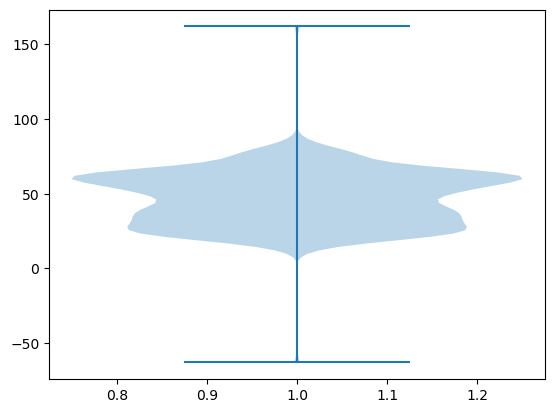

In [20]:
plt.violinplot(df['ASTV'])
plt.show()

# it has negative values which can be data entry error 
# its more spread out at 60 value i.e at 60 value the density is higher
# we understand the spread of data

# Pattern Recognition and Insights

In [43]:
#Identify any correlations between variables and discuss their potential implications.
df.corr() 

# there is like good correlation between a few variable like ASTV and NSP

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.062587,0.018807,-0.166229,-0.126563,-0.005432,-0.047650,0.241857,-0.169647,0.099289,-0.016168,-0.118421,0.236730,0.131839
AC,-0.062587,1.000000,0.010100,0.071282,-0.093590,-0.032963,-0.082410,-0.230207,0.132085,-0.109030,-0.092958,0.234174,0.033359,-0.309446
FM,0.018807,0.010100,1.000000,-0.053226,0.009718,0.029916,0.121459,-0.032691,0.017055,0.001184,-0.004149,0.097214,-0.017819,0.074446
UC,-0.166229,0.071282,-0.053226,1.000000,0.190128,-0.006938,0.070295,-0.181161,0.189406,-0.128446,-0.016030,0.107150,-0.066832,-0.185229
DL,-0.126563,-0.093590,0.009718,0.190128,1.000000,0.058413,0.144717,-0.069361,0.410102,-0.041897,-0.103283,0.408655,-0.023914,0.024879
DS,-0.005432,-0.032963,0.029916,-0.006938,0.058413,1.000000,0.004321,0.008426,0.016026,0.004634,0.047727,0.040834,-0.015294,0.065411
DP,-0.047650,-0.082410,0.121459,0.070295,0.144717,0.004321,1.000000,0.038119,0.118628,-0.022656,-0.042355,0.175323,-0.129204,0.295057
ASTV,0.241857,-0.230207,-0.032691,-0.181161,-0.069361,0.008426,0.038119,1.000000,-0.293882,0.241981,-0.218417,-0.206941,-0.010855,0.420873
MSTV,-0.169647,0.132085,0.017055,0.189406,0.410102,0.016026,0.118628,-0.293882,1.000000,-0.135876,0.079928,0.433035,-0.038017,-0.095876
ALTV,0.099289,-0.109030,0.001184,-0.128446,-0.041897,0.004634,-0.022656,0.241981,-0.135876,1.000000,-0.129847,-0.184207,-0.003101,0.305073
